In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

# Load data and get familiar with it

## Data properties

In [2]:
train = pd.read_csv('train.csv')
print(train.shape)
print(train.dtypes)

(1460, 81)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt   

## Sample data

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
train.describe()

/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.sort_values(by='LotArea')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
956,957,160,RM,24.0,1300,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2009,WD,Normal,124000
1039,1040,180,RM,21.0,1477,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,80000
614,615,180,RM,21.0,1491,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,75500
489,490,180,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,86000
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1038,1039,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,97000
75,76,180,RM,21.0,1596,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Normal,91000
235,236,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,89500
232,233,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,94500
225,226,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,COD,Abnorml,112000


## Plotting

In [7]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

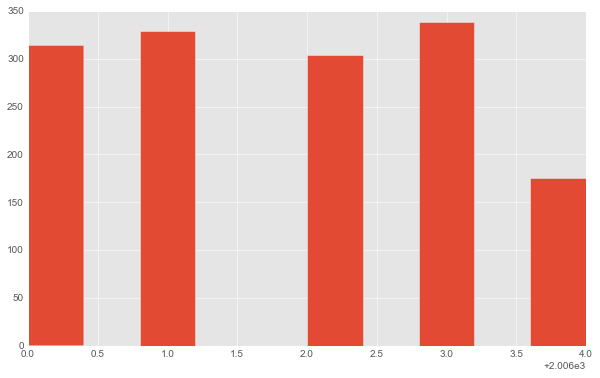

In [8]:
plt.hist(train.YrSold)
plt.show()

# Target

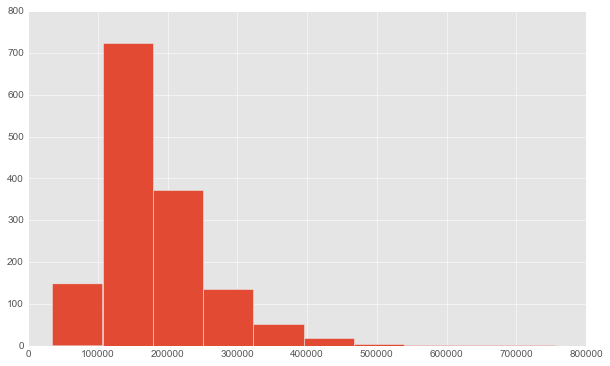

In [9]:
plt.hist(train.SalePrice)
plt.show()

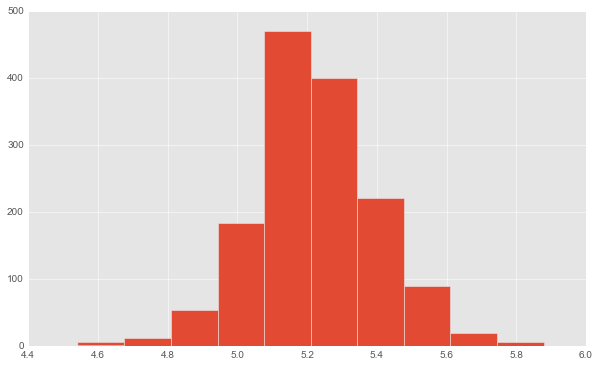

In [10]:
target = np.log10(train.SalePrice)
plt.hist(target)
plt.show()

# Features

## Handling categorical data

In [11]:
train['LandContour']

0       Lvl
1       Lvl
2       Lvl
3       Lvl
4       Lvl
5       Lvl
6       Lvl
7       Lvl
8       Lvl
9       Lvl
10      Lvl
11      Lvl
12      Lvl
13      Lvl
14      Lvl
15      Lvl
16      Lvl
17      Lvl
18      Lvl
19      Lvl
20      Lvl
21      Bnk
22      Lvl
23      Lvl
24      Lvl
25      Lvl
26      Lvl
27      Lvl
28      Lvl
29      Lvl
       ... 
1430    Lvl
1431    Lvl
1432    Lvl
1433    Lvl
1434    Low
1435    Lvl
1436    Lvl
1437    Lvl
1438    Lvl
1439    Lvl
1440    Bnk
1441    Lvl
1442    Lvl
1443    Lvl
1444    Lvl
1445    Lvl
1446    Lvl
1447    Lvl
1448    Lvl
1449    Lvl
1450    Lvl
1451    Lvl
1452    Lvl
1453    Lvl
1454    Lvl
1455    Lvl
1456    Lvl
1457    Lvl
1458    Lvl
1459    Lvl
Name: LandContour, dtype: object

In [12]:
train['CategoricalLandContour'] = train['LandContour'].astype("category")
train['CategoricalLandContour']

0       Lvl
1       Lvl
2       Lvl
3       Lvl
4       Lvl
5       Lvl
6       Lvl
7       Lvl
8       Lvl
9       Lvl
10      Lvl
11      Lvl
12      Lvl
13      Lvl
14      Lvl
15      Lvl
16      Lvl
17      Lvl
18      Lvl
19      Lvl
20      Lvl
21      Bnk
22      Lvl
23      Lvl
24      Lvl
25      Lvl
26      Lvl
27      Lvl
28      Lvl
29      Lvl
       ... 
1430    Lvl
1431    Lvl
1432    Lvl
1433    Lvl
1434    Low
1435    Lvl
1436    Lvl
1437    Lvl
1438    Lvl
1439    Lvl
1440    Bnk
1441    Lvl
1442    Lvl
1443    Lvl
1444    Lvl
1445    Lvl
1446    Lvl
1447    Lvl
1448    Lvl
1449    Lvl
1450    Lvl
1451    Lvl
1452    Lvl
1453    Lvl
1454    Lvl
1455    Lvl
1456    Lvl
1457    Lvl
1458    Lvl
1459    Lvl
Name: CategoricalLandContour, dtype: category
Categories (4, object): [Bnk, HLS, Low, Lvl]

In [13]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,CategoricalLandContour
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1460,7,281,54,1460,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,3,5,5,3,3,4,4,9,6,4
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,Lvl
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,605,1311,1326,1340,3,157,49,1267,1198,1311


## Correlation between features

In [14]:
correlation_values = train.select_dtypes(include=[np.number]).corr()
correlation_values

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


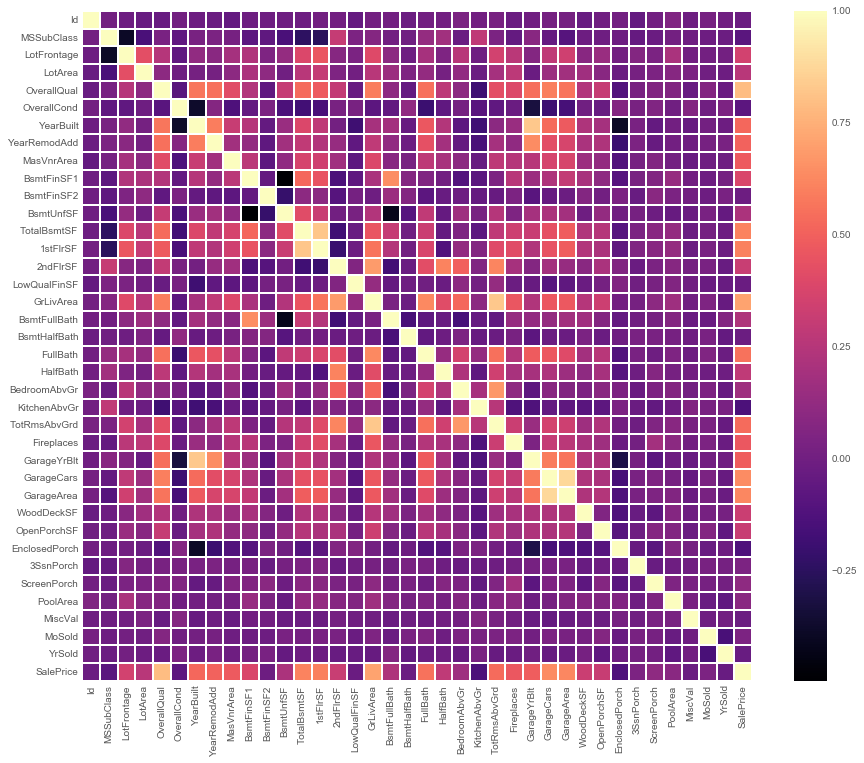

In [15]:
f, ax = plt.subplots(figsize=(15, 12))
_ = sns.heatmap(correlation_values, linecolor = 'white', cmap = 'magma', linewidths = 1)

## Relationship between features

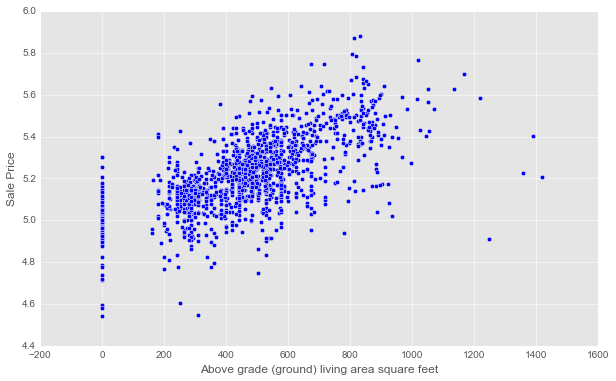

In [16]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

### Removing outliers

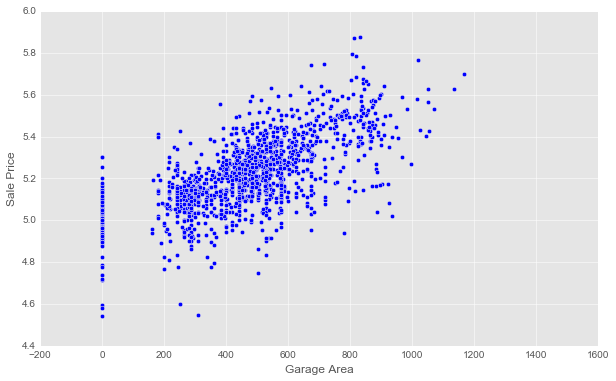

In [17]:
train = train[train['GarageArea'] < 1200]
plt.scatter(x=train['GarageArea'], y=np.log10(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

## Null values

In [18]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
nulls = nulls[nulls>0]
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449.0
MiscFeature,1402.0
Alley,1364.0
Fence,1174.0
FireplaceQu,689.0
LotFrontage,258.0
GarageQual,81.0
GarageCond,81.0
GarageFinish,81.0


## Missing data

In [19]:
train.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CategoricalLandContour
0,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,True,True,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False


In [20]:
train.isnull().sum()

Id                           0
MSSubClass                   0
MSZoning                     0
LotFrontage                258
LotArea                      0
Street                       0
Alley                     1364
LotShape                     0
LandContour                  0
Utilities                    0
LotConfig                    0
LandSlope                    0
Neighborhood                 0
Condition1                   0
Condition2                   0
BldgType                     0
HouseStyle                   0
OverallQual                  0
OverallCond                  0
YearBuilt                    0
YearRemodAdd                 0
RoofStyle                    0
RoofMatl                     0
Exterior1st                  0
Exterior2nd                  0
MasVnrType                   8
MasVnrArea                   8
ExterQual                    0
ExterCond                    0
Foundation                   0
                          ... 
KitchenAbvGr                 0
KitchenQ

In [21]:
train.isnull().sum() != 0

Id                        False
MSSubClass                False
MSZoning                  False
LotFrontage                True
LotArea                   False
Street                    False
Alley                      True
LotShape                  False
LandContour               False
Utilities                 False
LotConfig                 False
LandSlope                 False
Neighborhood              False
Condition1                False
Condition2                False
BldgType                  False
HouseStyle                False
OverallQual               False
OverallCond               False
YearBuilt                 False
YearRemodAdd              False
RoofStyle                 False
RoofMatl                  False
Exterior1st               False
Exterior2nd               False
MasVnrType                 True
MasVnrArea                 True
ExterQual                 False
ExterCond                 False
Foundation                False
                          ...  
KitchenA

In [22]:
sum(train.isnull().sum() != 0)

19

In [23]:
not_null_train = train.select_dtypes(include=[np.number]).interpolate().dropna()
sum(not_null_train.isnull().sum() != 0)

0

# Training and Evaluation (Base model)

In [28]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [31]:
def train_and_evaluate(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)
    lr =LinearRegression()
    my_model = lr.fit(X_train, y_train)
    
    train_predictions = my_model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    print('train error: ', train_rmse)
    
    predictions = my_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print('test_error: ', test_rmse)
    
    sns.regplot(y = train_predictions, x = y_train, color = 'red', label = 'Training Data', scatter_kws={'alpha':0.75})
    sns.regplot(y = predictions, x = y_test, color = 'green', label = 'Validation Data', scatter_kws={'alpha':0.75})
    plt.title('Predicted Values vs Test Values')
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.legend(loc = 'upper left')
    

train error:  0.0572569335252
test_error:  0.0585847924269


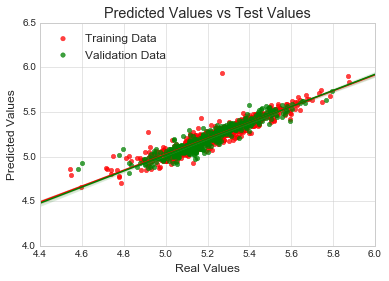

In [32]:
y1 = np.log10(train.SalePrice)
X1 = not_null_train.drop(['SalePrice', 'Id'], axis=1)
train_and_evaluate(X1, y1)

#  How to improve results further?

In [33]:
train = pd.read_csv('train.csv')
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


## Fill missing data

In [34]:
# categorical
print(train['PoolQC'])
train['PoolQC'].value_counts()
train['PoolQC'].fillna('No Pool', inplace = True)
print(train['PoolQC'])


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
1430    NaN
1431    NaN
1432    NaN
1433    NaN
1434    NaN
1435    NaN
1436    NaN
1437    NaN
1438    NaN
1439    NaN
1440    NaN
1441    NaN
1442    NaN
1443    NaN
1444    NaN
1445    NaN
1446    NaN
1447    NaN
1448    NaN
1449    NaN
1450    NaN
1451    NaN
1452    NaN
1453    NaN
1454    NaN
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, dtype: object
0       No Pool
1       No Pool
2       No Pool
3       No Pool
4       No Pool
5       No Pool
6       No Pool
7       No Pool
8       No Pool
9       No Pool
10      No Pool
11      No Pool
12      No Pool
13      No Pool
14      No Pool


In [35]:
train['MiscFeature'].fillna('None', inplace = True)
train['MiscFeature'].value_counts()

None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [36]:
train['Alley'].fillna('No alley access', inplace = True)
train['Fence'].fillna('No Fence', inplace = True)
train['FireplaceQu'].fillna('No Fireplace', inplace = True)
train['GarageType'].fillna('No Garage', inplace = True)
train['GarageCond'].fillna('No Garage', inplace = True)
train['GarageFinish'].fillna('No Garage', inplace = True)
train['GarageQual'].fillna('No Garage', inplace = True)
train['BsmtFinType2'].fillna('No Basement', inplace = True)
train['BsmtExposure'].fillna('No Basement', inplace = True)
train['BsmtQual'].fillna('No Basement', inplace = True)
train['BsmtCond'].fillna('No Basement', inplace = True)
train['BsmtFinType1'].fillna('No Basement', inplace = True)
train['MasVnrType'].fillna('None', inplace = True)
train['GarageYrBlt'].fillna('No Garage', inplace = True)



In [37]:
# Fill with Mode
print(train['Electrical'].value_counts())
train['Electrical'].fillna(value = 'SBrkr', inplace = True)
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [38]:
# Fill with 0
train['MasVnrArea'].fillna(0, inplace = True)
train['LotFrontage'].fillna(0, inplace = True)


In [39]:
cat_vars = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'YrSold', 'MoSold', 
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'YearBuilt', 'YearRemodAdd']
for col in cat_vars:
    train[col] = train[col].astype('category',copy=False)

train.dtypes

Id                  int64
MSSubClass       category
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual      category
OverallCond      category
YearBuilt        category
YearRemodAdd     category
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float64
ExterQual        category
ExterCond        category
Foundation       category
                   ...   
BedroomAbvGr        int64
KitchenAbvGr        int64
KitchenQual      category
TotRmsAbvGrd        int64
Functional       category
Fireplaces          int64
FireplaceQu      category
GarageType  

## Dummy variables for categorical data

In [40]:
# Creating Dummy Variables
cat = pd.get_dummies(train[cat_vars], drop_first = True)
train_dummy = train
train_dummy = pd.concat([train_dummy, cat], axis = 1)
train_dummy.drop(cat_vars, axis = 1, inplace = True)
train_dummy.dtypes

Id                     int64
LotFrontage          float64
LotArea                int64
MasVnrArea           float64
BsmtFinSF1             int64
BsmtFinSF2             int64
BsmtUnfSF              int64
TotalBsmtSF            int64
1stFlrSF               int64
2ndFlrSF               int64
LowQualFinSF           int64
GrLivArea              int64
BsmtFullBath           int64
BsmtHalfBath           int64
FullBath               int64
HalfBath               int64
BedroomAbvGr           int64
KitchenAbvGr           int64
TotRmsAbvGrd           int64
Fireplaces             int64
GarageCars             int64
GarageArea             int64
WoodDeckSF             int64
OpenPorchSF            int64
EnclosedPorch          int64
3SsnPorch              int64
ScreenPorch            int64
PoolArea               int64
MiscVal                int64
SalePrice              int64
                      ...   
YearRemodAdd_1981    float64
YearRemodAdd_1982    float64
YearRemodAdd_1983    float64
YearRemodAdd_1

## Evaluation

train error:  0.0291366970237
test_error:  0.0980843673781


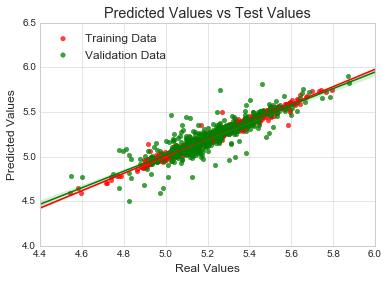

In [41]:
y = np.log10(train.SalePrice)
X = train_dummy.drop(['SalePrice', 'Id'], axis=1)
train_and_evaluate(X, y)

## Check for correlated variables

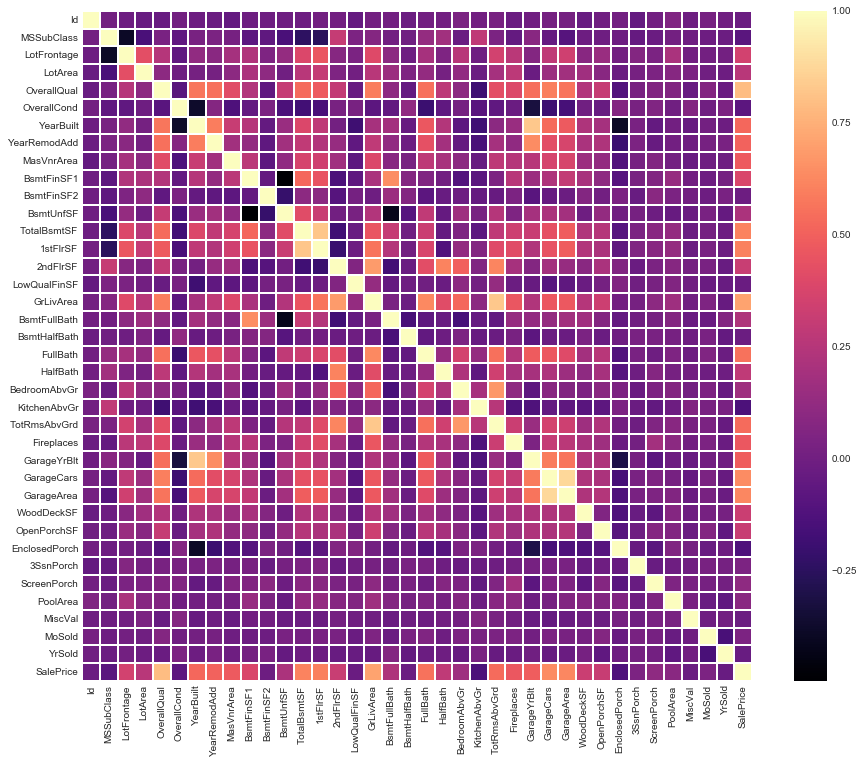

In [42]:
correlations = train.corr()

f, ax = plt.subplots(figsize=(15, 12))
_ = sns.heatmap(correlation_values, linecolor = 'white', cmap = 'magma', linewidths = 1)


In [43]:
correlations = correlations.iloc[:36, :36] 
cut_off = 0.5
high_corrs = correlations[correlations.abs() > cut_off][correlations.abs() != 1].unstack().dropna().to_dict()
high_corrs = pd.Series(high_corrs, index = high_corrs.keys())
high_corrs = high_corrs.reset_index()
high_corrs = pd.DataFrame(high_corrs)
high_corrs.columns = ['Attributes', 'Correlations']
high_corrs['Correlations'] = high_corrs['Correlations'].drop_duplicates(keep = 'first')
high_corrs.dropna().sort_values(by = 'Correlations', ascending = False)

,Attributes,Correlations
13,"(GarageArea, GarageCars)",0.882475
21,"(GrLivArea, TotRmsAbvGrd)",0.825489
6,"(TotalBsmtSF, 1stFlrSF)",0.819530
4,"(SalePrice, GrLivArea)",0.708624
25,"(2ndFlrSF, GrLivArea)",0.687501
7,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
28,"(BsmtFullBath, BsmtFinSF1)",0.649212
14,"(SalePrice, GarageCars)",0.640409
8,"(FullBath, GrLivArea)",0.630012
27,"(GarageArea, SalePrice)",0.623431


In [44]:
mvp_list = ['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 
            'TotRmsAbvGrd']
num_vars = ['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 
            'TotRmsAbvGrd', 'SalePrice']

## Variables correlated with target

In [46]:
k = 10
cols = correlations.nlargest(k, 'SalePrice')['SalePrice'].index
cols
# cm = np.corrcoef(train[cols].values.T)
# sns.set(font_scale=1.25)
# f, ax = plt.subplots(figsize=(12, 9))
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, linewidth = 5,
#                  yticklabels=cols.values, xticklabels=cols.values, cmap = 'viridis', linecolor = 'white')
# plt.show()

Index(['SalePrice', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'MasVnrArea', 'Fireplaces'],
      dtype='object')

## Dummying categorical data

In [47]:
# Selected categorical variables
cat_mvp_vars = ['MSSubClass', 'MSZoning', 'Utilities', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 
                'OverallQual', 'OverallCond', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'HeatingQC', 'CentralAir',
                'KitchenQual', 'GarageFinish', 'GarageQual', 'PoolQC', 'SaleType', 'YearRemodAdd']

In [48]:
d = train.iloc[:, 10:11]
print(d.dtypes)
d.LotConfig.unique

LotConfig    category
dtype: object


<bound method IndexOpsMixin.unique of 0        Inside
1           FR2
2        Inside
3        Corner
4           FR2
5        Inside
6        Inside
7        Corner
8        Inside
9        Corner
10       Inside
11       Inside
12       Inside
13       Inside
14       Corner
15       Corner
16      CulDSac
17       Inside
18       Inside
19       Inside
20       Corner
21       Inside
22       Inside
23       Inside
24       Inside
25       Corner
26       Corner
27       Inside
28      CulDSac
29       Inside
         ...   
1430     Inside
1431     Inside
1432     Inside
1433     Inside
1434     Inside
1435     Inside
1436        FR2
1437        FR2
1438     Inside
1439     Inside
1440     Inside
1441     Inside
1442     Inside
1443     Inside
1444        FR2
1445     Inside
1446    CulDSac
1447     Inside
1448     Inside
1449     Inside
1450        FR2
1451     Inside
1452     Inside
1453     Inside
1454     Inside
1455     Inside
1456     Inside
1457     Inside
1458     Inside
14

In [49]:
dummies = pd.get_dummies(d)
print(dummies.dtypes)
print(dummies)

LotConfig_Corner     float64
LotConfig_CulDSac    float64
LotConfig_FR2        float64
LotConfig_FR3        float64
LotConfig_Inside     float64
dtype: object
      LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                  0.0                0.0            0.0            0.0   
1                  0.0                0.0            1.0            0.0   
2                  0.0                0.0            0.0            0.0   
3                  1.0                0.0            0.0            0.0   
4                  0.0                0.0            1.0            0.0   
5                  0.0                0.0            0.0            0.0   
6                  0.0                0.0            0.0            0.0   
7                  1.0                0.0            0.0            0.0   
8                  0.0                0.0            0.0            0.0   
9                  1.0                0.0            0.0            0.0   
10              

## Feature selection

In [50]:
best_features = mvp_list + cat_mvp_vars

categorical = pd.get_dummies(train[cat_mvp_vars], drop_first = True)

dummy_best_feature_train = train[num_vars]
dummy_best_feature_train = pd.concat([dummy_best_feature_train, categorical], axis = 1)
dummy_best_feature_train.dtypes

GrLivArea                 int64
GarageCars                int64
GarageArea                int64
TotalBsmtSF               int64
1stFlrSF                  int64
FullBath                  int64
TotRmsAbvGrd              int64
SalePrice                 int64
MSSubClass_30           float64
MSSubClass_40           float64
MSSubClass_45           float64
MSSubClass_50           float64
MSSubClass_60           float64
MSSubClass_70           float64
MSSubClass_75           float64
MSSubClass_80           float64
MSSubClass_85           float64
MSSubClass_90           float64
MSSubClass_120          float64
MSSubClass_160          float64
MSSubClass_180          float64
MSSubClass_190          float64
MSZoning_FV             float64
MSZoning_RH             float64
MSZoning_RL             float64
MSZoning_RM             float64
Utilities_NoSeWa        float64
Neighborhood_Blueste    float64
Neighborhood_BrDale     float64
Neighborhood_BrkSide    float64
                         ...   
YearRemo

train error:  0.0516773412862
test_error:  0.0677066584051


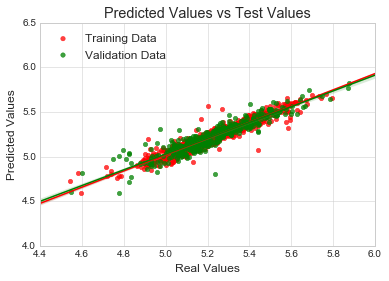

In [51]:
y = np.log10(train.SalePrice)
X = dummy_best_feature_train.drop(['SalePrice'], axis=1)
train_and_evaluate(X, y)